In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\iit delhi fsm\\Medical Price Dataset.csv")

In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
df.shape

(1338, 7)

In [8]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

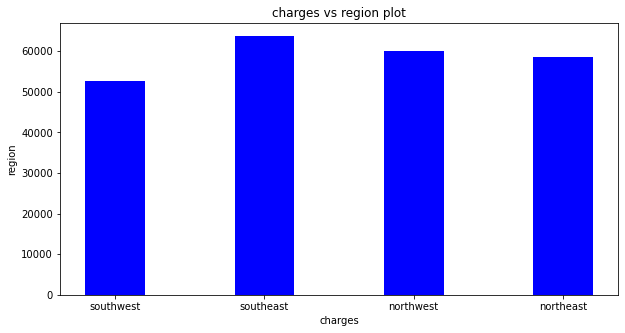

In [15]:
region = list(df["region"])
charges = list(df["charges"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(region, charges, color ='blue',width = 0.4)
 
plt.xlabel("region")
plt.ylabel("charges")
plt.title("charges vs region plot")
plt.show()

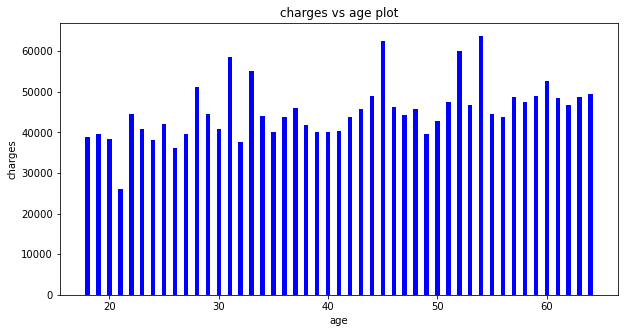

In [34]:
age = list(df["age"])
charges = list(df["charges"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(age, charges, color ='blue',width = 0.4)
 
plt.xlabel("age")
plt.ylabel("charges")
plt.title("charges vs age plot")
plt.show()

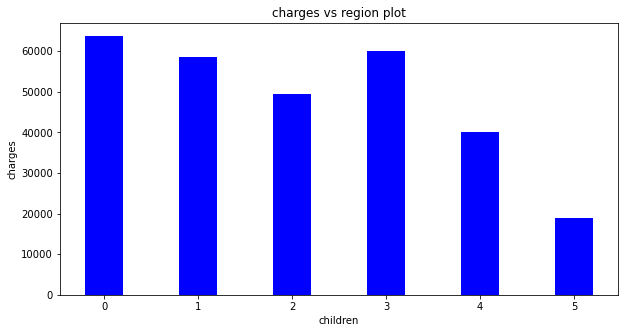

In [35]:
children = list(df["children"])
charges = list(df["charges"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(children, charges, color ='blue',width = 0.4)
 
plt.xlabel("children")
plt.ylabel("charges")
plt.title("charges vs no.of children plot")
plt.show()

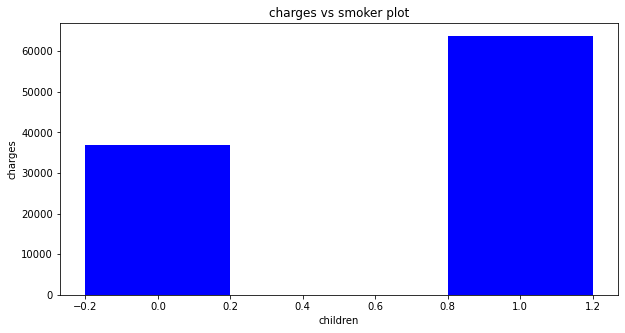

In [37]:
smoker = list(df["smoker"])
charges = list(df["charges"])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(smoker, charges, color ='blue',width = 0.4)
 
plt.xlabel("children")
plt.ylabel("charges")
plt.title("charges vs smoker plot")
plt.show()

In [22]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [23]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [25]:
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
def linear_regression(x_train, y_train):
    # Add a column of ones to x_train for the intercept term
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)
    
    # Calculate the coefficients using the normal equation
    x_transpose = np.transpose(x_train)
    x_transpose_dot_x = np.dot(x_transpose, x_train)
    x_transpose_dot_y = np.dot(x_transpose, y_train)
    coefficients = np.linalg.solve(x_transpose_dot_x, x_transpose_dot_y)
    
    return coefficients


In [27]:
coefficients = linear_regression(x_train, y_train)

# Print the coefficients
print('Intercept:', coefficients[0])
print('Coefficients:', coefficients[1:])

Intercept: -11661.98390882413
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [29]:
def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2_score = 1 - (ss_residual / ss_total)
    return r2_score

R-squared Score: 0.7998747145449959


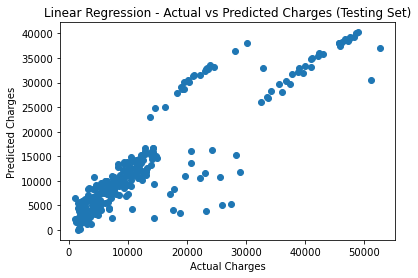

In [30]:
y_pred = np.dot(np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1), coefficients)

# Calculate R-squared score
r2_score = r_squared(y_test, y_pred)
print('R-squared Score:', r2_score)

# Visualize the actual vs predicted charges for the testing set
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs Predicted Charges (Testing Set)')
plt.show()